<a href="https://colab.research.google.com/github/mateobivol/project-2/blob/main/Project_1_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol=IBM&apikey=A601RIXZHX349L2M'
r = requests.get(url)
data= r.json()
stock=pd.DataFrame.from_dict(data["Weekly Time Series"], orient="index")
stock.reset_index(inplace=True)
stock.rename(columns={"1. open":"open","2. high":"high", "3. low":"low","4. close":"close","5. volume":"volume","index":"date"},inplace=True)
stock["ticker"]="IBM"
 
def stock(ticker=True):
  url = 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol=' +ticker+"&apikey=A601RIXZHX349L2M"
  #print(url)
  r = requests.get(url)
  data= r.json()
  stock=pd.DataFrame.from_dict(data["Weekly Time Series"], orient="index")
  stock.reset_index(inplace=True)
  stock.rename(columns={"1. open": "open", "2. high": "high", "3. low": "low", "4. close": "close", "5. volume": "volume", "index": "date"},inplace=True)
  stock["ticker"]=ticker
  return stock
stocks= stock(ticker="A")

In [2]:
stocks['date']= pd.to_datetime(stocks['date'])
stocks.dtypes
stocks.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ticker'], dtype='object')

In [3]:
column_names= stocks.columns
for i in column_names[1:6]:
  stocks[i]= stocks[i].astype('float')
stocks.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
ticker            object
dtype: object

No handles with labels found to put in legend.


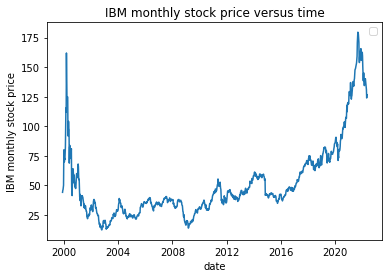

In [4]:
import matplotlib.pyplot as plt


plt.plot(stocks['date'],stocks['high'])
plt.title("IBM monthly stock price versus time")
plt.xlabel('date')
plt.ylabel('IBM monthly stock price')
plt.legend()
plt.show()